## Lab 1 : Python Libraries for time series

### Importing the Libraries

necessary libraries - numpy,pandas,matplotlib,statsmodels,seaborn

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot,autocorrelation_plot
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

### Reading the dataset

In [2]:
df = pd.read_csv('Microsoft_Stock.csv')
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [3]:
df = pd.read_csv('Microsoft_stock.csv', parse_dates=['Date'], index_col='Date') # sets date as the index in date time format by parsing the date column
df = df.sort_index()
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455


## Lab 2 : Feature Engineering Time Series Data

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB
None


In [5]:
print(df.describe())

              Open         High          Low        Close        Volume
count  1511.000000  1511.000000  1511.000000  1511.000000  1.511000e+03
mean    107.385976   108.437472   106.294533   107.422091  3.019863e+07
std      56.691333    57.382276    55.977155    56.702299  1.425266e+07
min      40.340000    40.740000    39.720000    40.290000  1.016120e+05
25%      57.860000    58.060000    57.420000    57.855000  2.136213e+07
50%      93.990000    95.100000    92.920000    93.860000  2.662962e+07
75%     139.440000   140.325000   137.825000   138.965000  3.431962e+07
max     245.030000   246.130000   242.920000   244.990000  1.352271e+08


In [6]:
print(df.corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.999775  0.999757  0.999541  0.054072
High    0.999775  1.000000  0.999622  0.999731  0.062573
Low     0.999757  0.999622  1.000000  0.999767  0.044514
Close   0.999541  0.999731  0.999767  1.000000  0.052153
Volume  0.054072  0.062573  0.044514  0.052153  1.000000


7 day moving average

In [7]:
df['7_day_MA'] = df['Close'].rolling(window=7).mean()
df

,Open,High,Low,Close,Volume,7_day_MA
Date,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,NaN
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,NaN
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,NaN
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,NaN
...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,234.211429
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,234.131429
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,234.777143


4 day moving average

In [8]:
df['4_day_MA'] = df['Close'].rolling(window=4).mean()

In [9]:
df

,Open,High,Low,Close,Volume,7_day_MA,4_day_MA
Date,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,NaN,NaN
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,NaN,NaN
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,NaN,41.0225
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,NaN,41.1975
...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,234.211429,235.3425
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,234.131429,235.4650
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,234.777143,234.8800


5 day Centered moving average

In [10]:
df['5_day_CMA'] = df['Close'].rolling(window = 5,center=True).mean()
df

,Open,High,Low,Close,Volume,7_day_MA,4_day_MA,5_day_CMA
Date,,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,NaN,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,NaN,NaN,NaN
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,NaN,NaN,41.102
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,NaN,41.0225,41.254
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,NaN,41.1975,41.540
...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,234.211429,235.3425,235.420
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,234.131429,235.4650,234.274
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,234.777143,234.8800,234.336


In [11]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

In [12]:
df

,Open,High,Low,Close,Volume,7_day_MA,4_day_MA,5_day_CMA,Year,Month,Day
Date,,,,,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,NaN,NaN,2015,4,1
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,NaN,NaN,NaN,2015,4,2
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,NaN,NaN,41.102,2015,4,6
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,NaN,41.0225,41.254,2015,4,7
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,NaN,41.1975,41.540,2015,4,8
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,234.211429,235.3425,235.420,2021,3,25
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,234.131429,235.4650,234.274,2021,3,26
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,234.777143,234.8800,234.336,2021,3,29


In [13]:
df['fluctuation'] = df['High'] - df['Low']
df

,Open,High,Low,Close,Volume,7_day_MA,4_day_MA,5_day_CMA,Year,Month,Day,fluctuation
Date,,,,,,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,NaN,NaN,2015,4,1,0.45
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,NaN,NaN,NaN,2015,4,2,0.62
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,NaN,NaN,41.102,2015,4,6,1.60
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,NaN,41.0225,41.254,2015,4,7,0.60
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,NaN,41.1975,41.540,2015,4,8,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,234.211429,235.3425,235.420,2021,3,25,5.37
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,234.131429,235.4650,234.274,2021,3,26,5.16
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,234.777143,234.8800,234.336,2021,3,29,4.92


In [14]:
df['change'] = df['Close'].pct_change()
df

,Open,High,Low,Close,Volume,7_day_MA,4_day_MA,5_day_CMA,Year,Month,Day,fluctuation,change
Date,,,,,,,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,NaN,NaN,2015,4,1,0.45,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,NaN,NaN,NaN,2015,4,2,0.62,-0.010560
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,NaN,NaN,41.102,2015,4,6,1.60,0.031273
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,NaN,41.0225,41.254,2015,4,7,0.60,-0.000481
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,NaN,41.1975,41.540,2015,4,8,0.65,-0.002649
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,234.211429,235.3425,235.420,2021,3,25,5.37,-0.013251
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,234.131429,235.4650,234.274,2021,3,26,5.16,0.017819
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,234.777143,234.8800,234.336,2021,3,29,4.92,-0.005244


### Lab 3 : Visualizing the time series

Text(0.5, 1.0, 'Correlation heatmap')

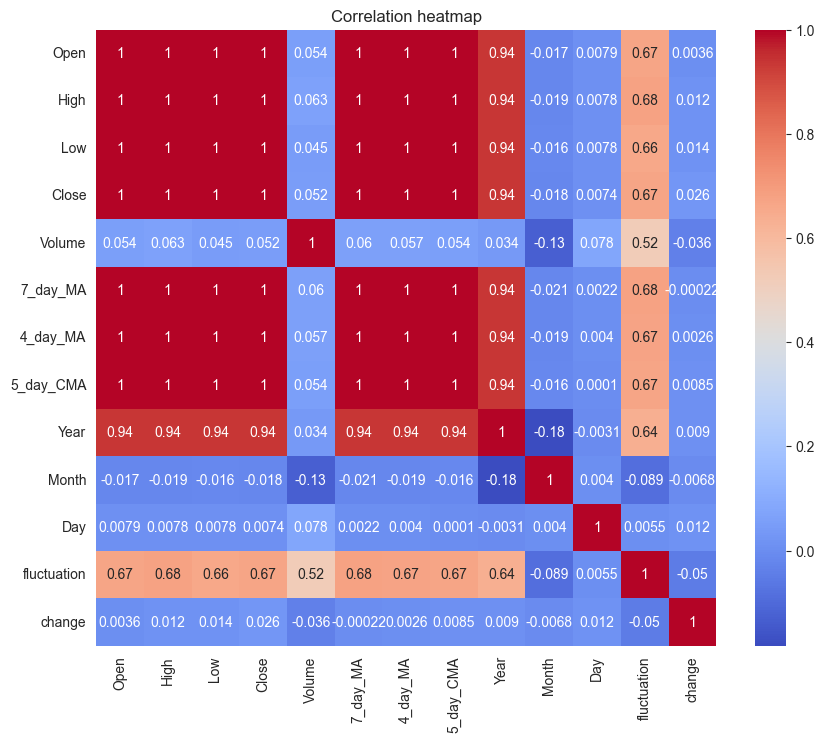

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')
plt.title('Correlation heatmap')

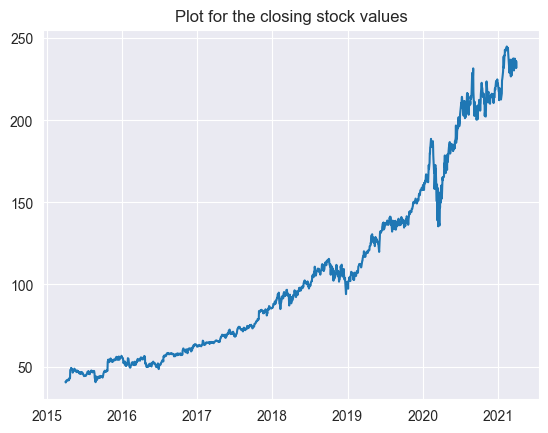

In [16]:
plt.plot(df['Close'])
plt.title('Plot for the closing stock values')
plt.show()

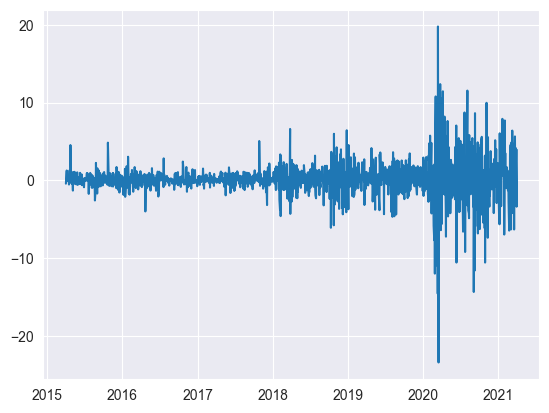

In [108]:
plt.plot(df['Close'].diff().dropna())

Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the observation at the next time step (t+1) on the y-axis.
-> If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
-> If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
-> Either relationship is good as they can be modeled.
More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship. A ball in the middle or a spread across the plot suggests a weak or no relationship.


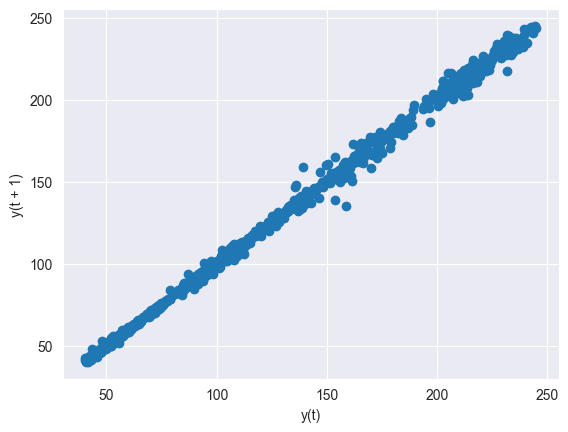

In [17]:
lag_plot(df['Close'])
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

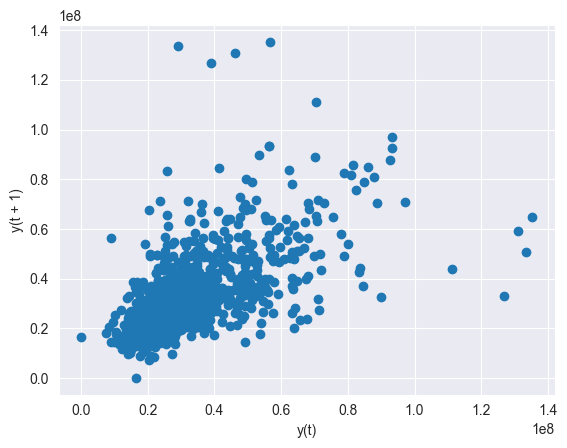

In [18]:
lag_plot(df['Volume'])

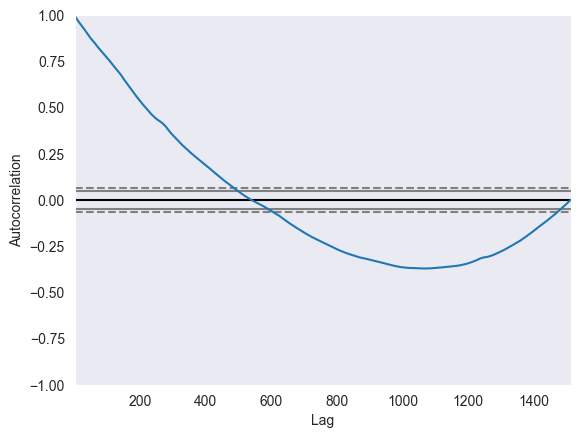

In [19]:
autocorrelation_plot(df['Close'])
plt.show()

### Lab 4 : Resampling and Interpolation

Resampling changes the frequency of data, such as from daily to monthly, while interpolation fills missing data points.

In [20]:
upsampled_df = df.resample('D').mean()
upsampled_df

,Open,High,Low,Close,Volume,7_day_MA,4_day_MA,5_day_CMA,Year,Month,Day,fluctuation,change
Date,,,,,,,,,,,,,
2015-04-01,40.60,40.76,40.31,40.72,36865322.0,NaN,NaN,NaN,2015.0,4.0,1.0,0.45,NaN
2015-04-02,40.66,40.74,40.12,40.29,37487476.0,NaN,NaN,NaN,2015.0,4.0,2.0,0.62,-0.010560
2015-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-29,236.59,236.80,231.88,235.24,25227455.0,234.777143,234.8800,234.336,2021.0,3.0,29.0,4.92,-0.005244


In [21]:
upsampled_df = upsampled_df.interpolate(method='linear')
upsampled_df

,Open,High,Low,Close,Volume,7_day_MA,4_day_MA,5_day_CMA,Year,Month,Day,fluctuation,change
Date,,,,,,,,,,,,,
2015-04-01,40.60,40.76,40.310,40.720000,3.686532e+07,NaN,NaN,NaN,2015.0,4.0,1.0,0.450,NaN
2015-04-02,40.66,40.74,40.120,40.290000,3.748748e+07,NaN,NaN,NaN,2015.0,4.0,2.0,0.620,-0.010560
2015-04-03,40.58,41.00,40.135,40.605000,3.792153e+07,NaN,NaN,NaN,2015.0,4.0,3.0,0.865,-0.000102
2015-04-04,40.50,41.26,40.150,40.920000,3.835558e+07,NaN,NaN,NaN,2015.0,4.0,4.0,1.110,0.010357
2015-04-05,40.42,41.52,40.165,41.235000,3.878964e+07,NaN,NaN,NaN,2015.0,4.0,5.0,1.355,0.020815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,233.23,236.74,231.660,236.066667,2.539572e+07,234.346667,235.2700,234.294667,2021.0,3.0,27.0,5.080,0.010131
2021-03-28,234.91,236.77,231.770,235.653333,2.531159e+07,234.561905,235.0750,234.315333,2021.0,3.0,28.0,5.000,0.002444
2021-03-29,236.59,236.80,231.880,235.240000,2.522746e+07,234.777143,234.8800,234.336000,2021.0,3.0,29.0,4.920,-0.005244


In [22]:
upsampled_df = df.resample('D').mean()
upsampled_df

,Open,High,Low,Close,Volume,7_day_MA,4_day_MA,5_day_CMA,Year,Month,Day,fluctuation,change
Date,,,,,,,,,,,,,
2015-04-01,40.60,40.76,40.31,40.72,36865322.0,NaN,NaN,NaN,2015.0,4.0,1.0,0.45,NaN
2015-04-02,40.66,40.74,40.12,40.29,37487476.0,NaN,NaN,NaN,2015.0,4.0,2.0,0.62,-0.010560
2015-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-29,236.59,236.80,231.88,235.24,25227455.0,234.777143,234.8800,234.336,2021.0,3.0,29.0,4.92,-0.005244


In [23]:
downsampled_df = df.resample('M').mean()
downsampled_df

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_8657/833233481.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  downsampled_df = df.resample('M').mean()


,Open,High,Low,Close,Volume,7_day_MA,4_day_MA,5_day_CMA,Year,Month,Day,fluctuation,change
Date,,,,,,,,,,,,,
2015-04-30,43.070952,43.736667,42.870952,43.466667,4.164453e+07,42.969238,43.245972,43.735158,2015.0,4.0,16.285714,0.865714,0.009223
2015-05-31,47.590000,47.977000,47.185500,47.530000,3.165364e+07,47.723643,47.656375,47.539900,2015.0,5.0,15.300000,0.791500,-0.001783
2015-06-30,46.104545,46.466364,45.679545,45.964091,3.022061e+07,46.275195,46.153182,45.967909,2015.0,6.0,14.954545,0.786818,-0.002661
2015-07-31,45.484545,46.013182,45.145455,45.611818,3.297537e+07,45.413831,45.456136,45.614091,2015.0,7.0,16.954545,0.867727,0.002629
2015-08-31,45.541905,46.120476,44.933810,45.506667,3.697607e+07,45.950884,45.718929,45.460476,2015.0,8.0,16.238095,1.186667,-0.003096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,214.210000,216.458000,211.854000,214.139000,2.867372e+07,212.975000,213.301375,214.168900,2020.0,11.0,14.700000,4.604000,0.002963
2020-12-31,217.612727,219.528636,216.009091,217.963182,2.702596e+07,216.712013,217.415114,217.802636,2020.0,12.0,15.590909,3.519545,0.001790
2021-01-31,221.942632,224.572105,219.524211,221.975263,3.410516e+07,220.327970,221.029605,222.282632,2021.0,1.0,16.421053,5.047895,0.002370


/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_8657/4002390493.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['Close'].resample('M').mean()


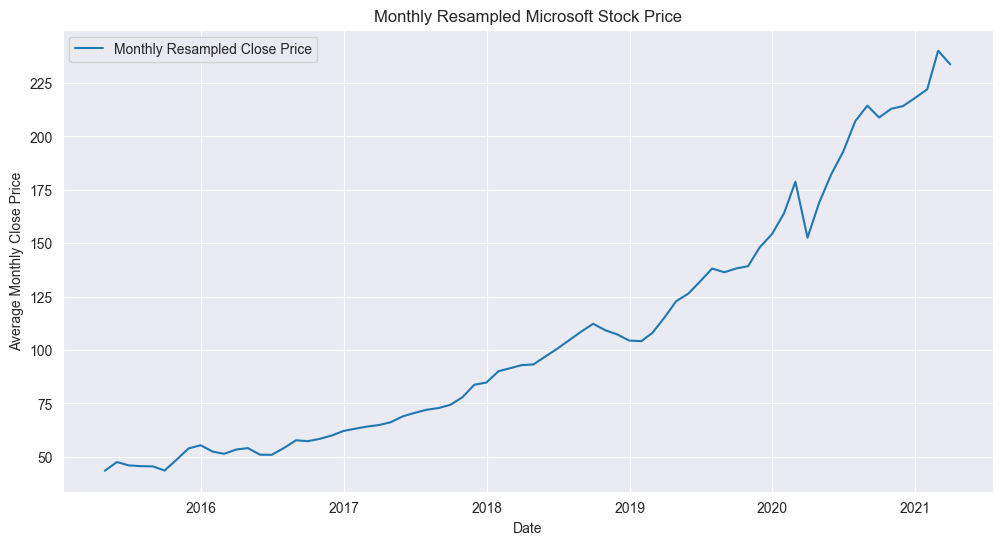

In [24]:
# Resample to monthly frequency, taking the average for each month
monthly_df = df['Close'].resample('M').mean()

# Plot the monthly data
plt.figure(figsize=(12, 6))
plt.plot(monthly_df, label='Monthly Resampled Close Price')
plt.title('Monthly Resampled Microsoft Stock Price')
plt.xlabel('Date')
plt.ylabel('Average Monthly Close Price')
plt.legend()
plt.show()

### Lab 5 : Explore different power-based transforms for time series forecasting

In [25]:
df['Log_Close'] = np.log(df['Close'])

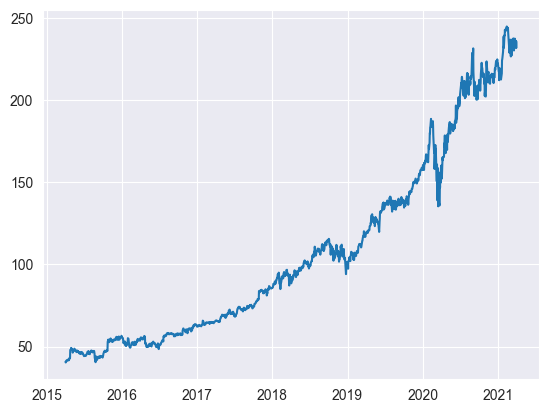

In [26]:
plt.plot(df['Close'])
plt.show()

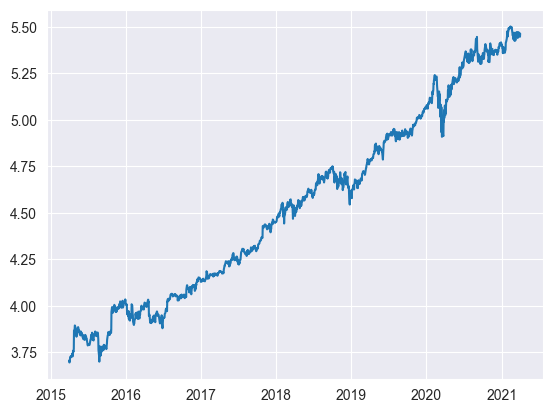

In [27]:
plt.plot(df['Log_Close'])
plt.show()

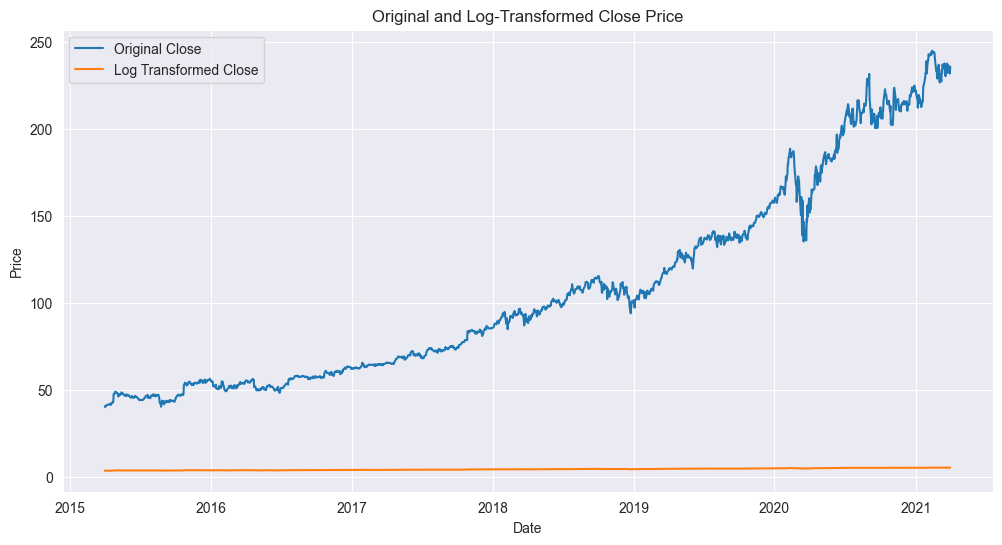

In [29]:
# Plot original and log-transformed data
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original Close')
plt.plot(df['Log_Close'], label='Log Transformed Close')
plt.title('Original and Log-Transformed Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Lab 6 : Moving average smoothing for time series forecasting

In [30]:
df

,Open,High,Low,Close,Volume,7_day_MA,4_day_MA,5_day_CMA,Year,Month,Day,fluctuation,change,Log_Close
Date,,,,,,,,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,NaN,NaN,2015,4,1,0.45,NaN,3.706719
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,NaN,NaN,NaN,2015,4,2,0.62,-0.010560,3.696103
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,NaN,NaN,41.102,2015,4,6,1.60,0.031273,3.726898
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,NaN,41.0225,41.254,2015,4,7,0.60,-0.000481,3.726416
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,NaN,41.1975,41.540,2015,4,8,0.65,-0.002649,3.723764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,234.211429,235.3425,235.420,2021,3,25,5.37,-0.013251,5.448202
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,234.131429,235.4650,234.274,2021,3,26,5.16,0.017819,5.465864
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,234.777143,234.8800,234.336,2021,3,29,4.92,-0.005244,5.460606


In [31]:
df['30_day_MA'] = df['Close'].rolling(window = 30).mean()
df

,Open,High,Low,Close,Volume,7_day_MA,4_day_MA,5_day_CMA,Year,Month,Day,fluctuation,change,Log_Close,30_day_MA
Date,,,,,,,,,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,NaN,NaN,2015,4,1,0.45,NaN,3.706719,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,NaN,NaN,NaN,2015,4,2,0.62,-0.010560,3.696103,NaN
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,NaN,NaN,41.102,2015,4,6,1.60,0.031273,3.726898,NaN
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,NaN,41.0225,41.254,2015,4,7,0.60,-0.000481,3.726416,NaN
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,NaN,41.1975,41.540,2015,4,8,0.65,-0.002649,3.723764,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,234.211429,235.3425,235.420,2021,3,25,5.37,-0.013251,5.448202,235.367
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,234.131429,235.4650,234.274,2021,3,26,5.16,0.017819,5.465864,235.100
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,234.777143,234.8800,234.336,2021,3,29,4.92,-0.005244,5.460606,234.775


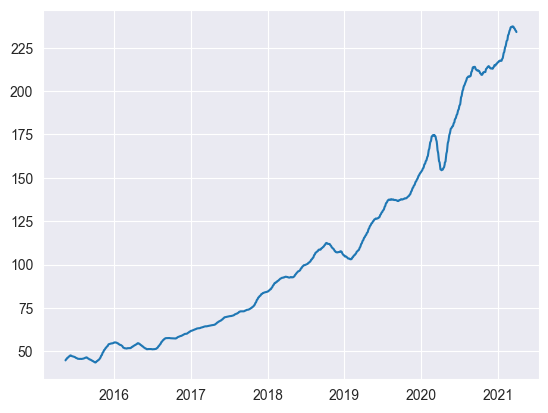

In [34]:
plt.plot(df['30_day_MA'])
plt.show()

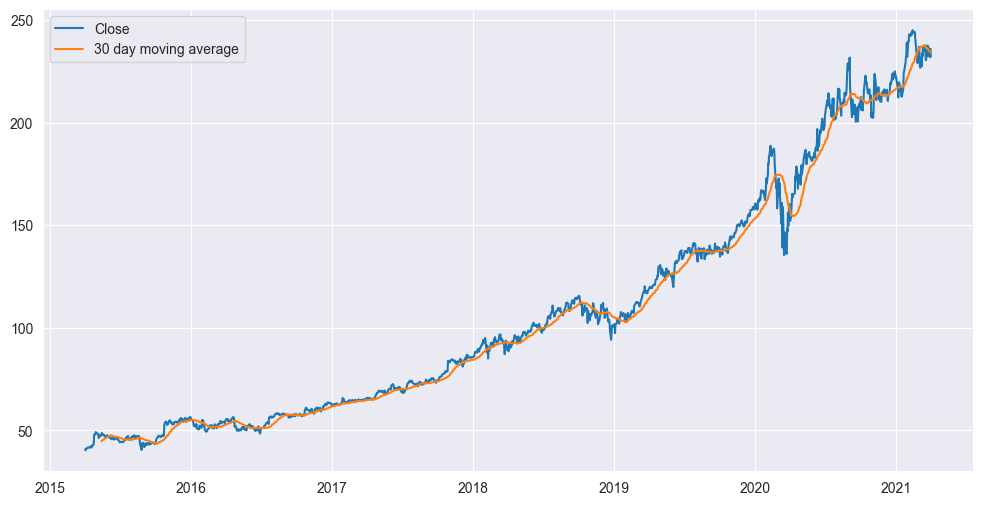

In [33]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label = 'Close')
plt.plot(df['30_day_MA'],label = '30 day moving average')
plt.legend()
plt.show()

### Lab 7 : Identification of White noise in time series

White noise has constant mean, variance, and no autocorrelation. You can visually check or use the autocorrelation function (ACF) plot.

In [35]:
len(df)

1511

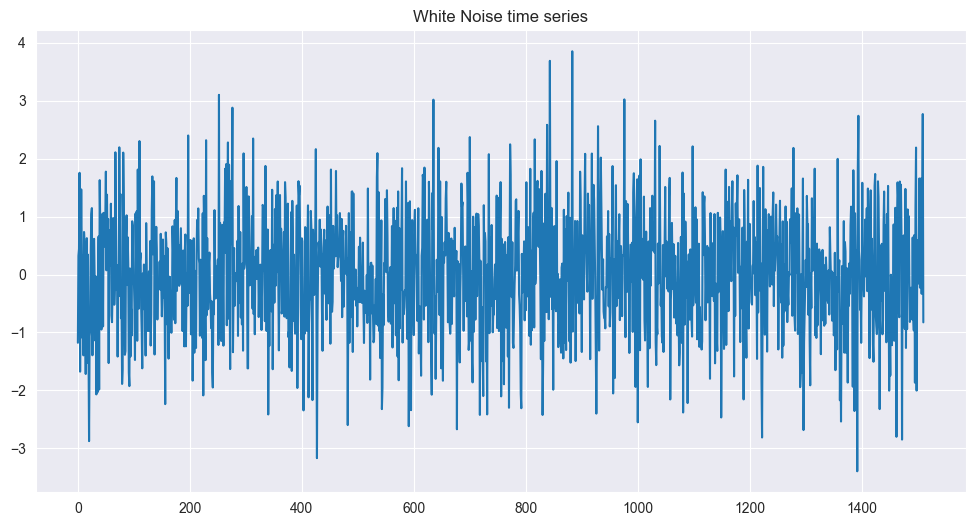

In [36]:
white_noise = np.random.normal(size = len(df))
plt.figure(figsize=(12,6))
plt.plot(white_noise,label = 'White Noise')
plt.title('White Noise time series')
plt.show()

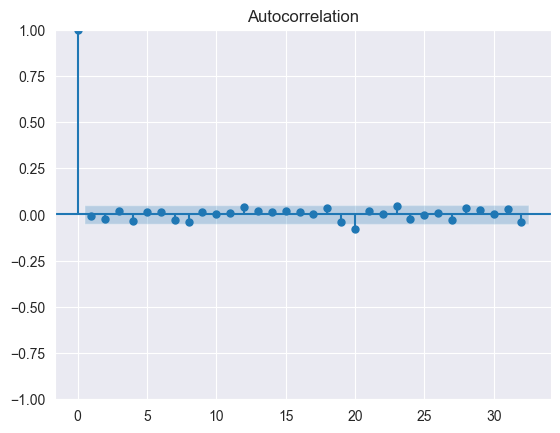

In [45]:
plot_acf(white_noise)
plt.show()

### Lab 8 : Identification of white random walk time series

A random walk is a type of time series where each value is the sum of the previous value and a random step. It is a non-stationary process, meaning its statistical properties like mean and variance change over time.

In [49]:
random_walk = np.cumsum(np.random.normal(size = len(df)))

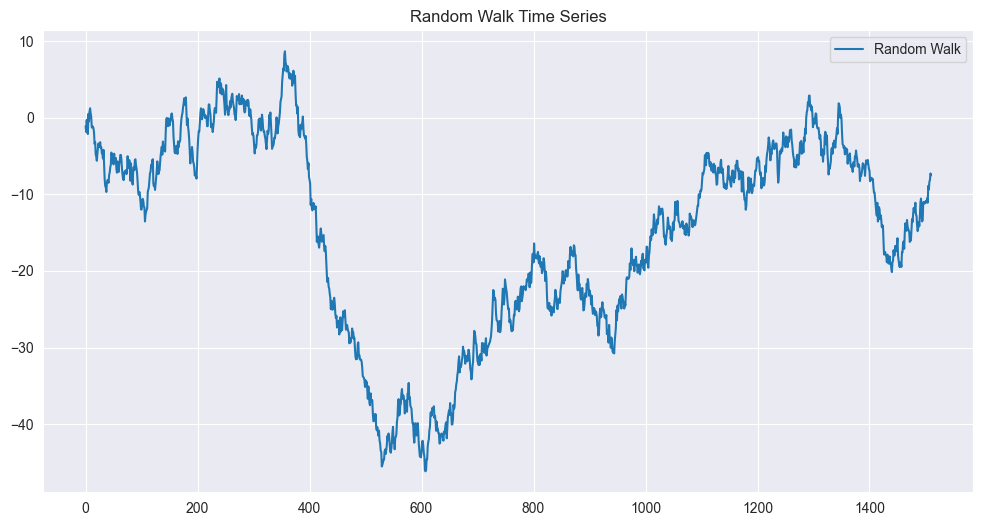

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(random_walk, label='Random Walk')
plt.title('Random Walk Time Series')
plt.legend()
plt.show()

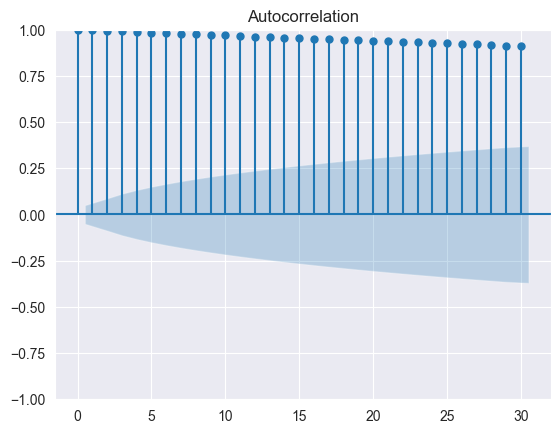

In [52]:
plot_acf(random_walk,lags=30)
plt.show()

### Lab 9 : Decompose Time Series Data

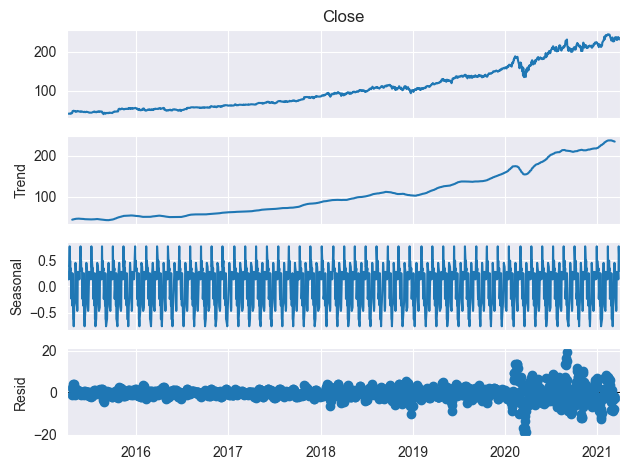

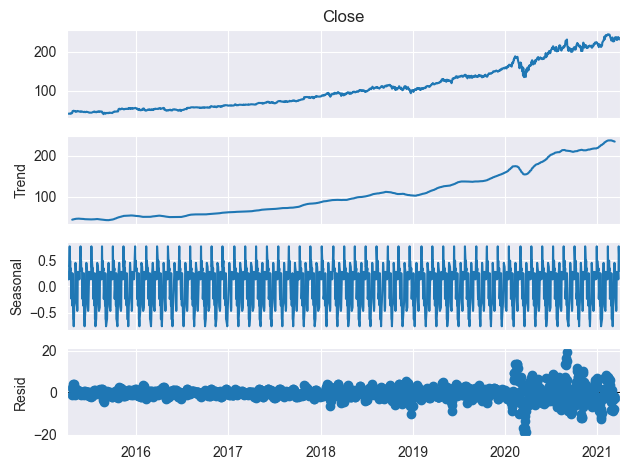

In [56]:
decomposition = seasonal_decompose(df['Close'],model = 'additive',period = 30)
decomposition.plot()

### Lab 10 : Use and Remove Trends

In [58]:
decomposition.trend

Date
2015-04-01 16:00:00   NaN
2015-04-02 16:00:00   NaN
2015-04-06 16:00:00   NaN
2015-04-07 16:00:00   NaN
2015-04-08 16:00:00   NaN
                       ..
2021-03-25 16:00:00   NaN
2021-03-26 16:00:00   NaN
2021-03-29 16:00:00   NaN
2021-03-30 16:00:00   NaN
2021-03-31 16:00:00   NaN
Name: trend, Length: 1511, dtype: float64

In [61]:
df['Detrended_Close'] = df['Close'].diff()

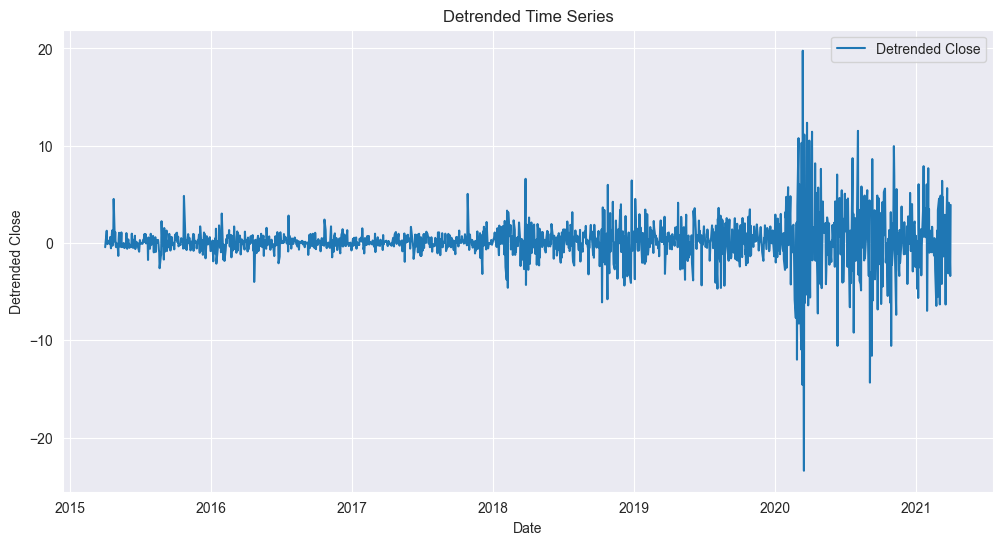

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(df['Detrended_Close'], label='Detrended Close')
plt.title('Detrended Time Series')
plt.xlabel('Date')
plt.ylabel('Detrended Close')
plt.legend()
plt.show()

In [67]:
df

,Open,High,Low,Close,Volume,7_day_MA,4_day_MA,5_day_CMA,Year,Month,Day,fluctuation,change,Log_Close,30_day_MA,Detrended_Close
Date,,,,,,,,,,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,NaN,NaN,2015,4,1,0.45,NaN,3.706719,NaN,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,NaN,NaN,NaN,2015,4,2,0.62,-0.010560,3.696103,NaN,-0.43
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,NaN,NaN,41.102,2015,4,6,1.60,0.031273,3.726898,NaN,1.26
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,NaN,41.0225,41.254,2015,4,7,0.60,-0.000481,3.726416,NaN,-0.02
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,NaN,41.1975,41.540,2015,4,8,0.65,-0.002649,3.723764,NaN,-0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,234.211429,235.3425,235.420,2021,3,25,5.37,-0.013251,5.448202,235.367,-3.12
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,234.131429,235.4650,234.274,2021,3,26,5.16,0.017819,5.465864,235.100,4.14
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,234.777143,234.8800,234.336,2021,3,29,4.92,-0.005244,5.460606,234.775,-1.24


### Lab 11 : Use and Remove Seasonality

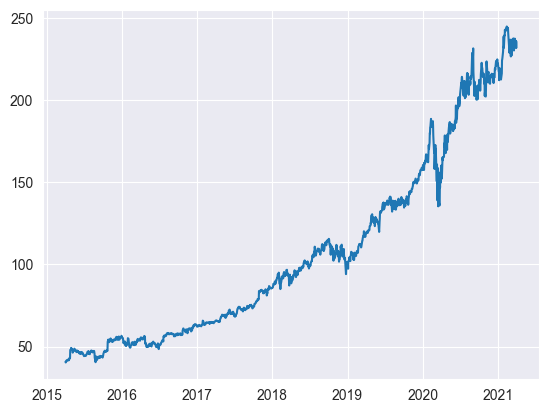

In [71]:
plt.plot(df['Close'])

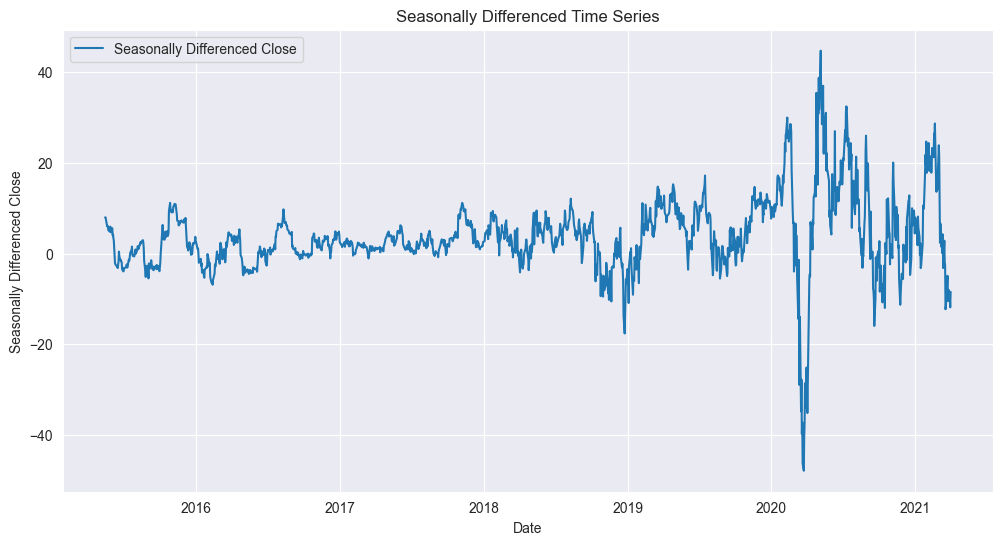

In [69]:
# Perform seasonal differencing
df['Seasonally_Differenced_Close'] = df['Close'].diff(periods=30)

# Plot the seasonally differenced time series
plt.figure(figsize=(12, 6))
plt.plot(df['Seasonally_Differenced_Close'], label='Seasonally Differenced Close')
plt.title('Seasonally Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Seasonally Differenced Close')
plt.legend()
plt.show()

### Lab 12 : Stationarity in Time Series Data

In [72]:
result = adfuller(df['Close'],autolag='AIC')
print('ADF stat : ',result[0])
print('p - val : ',result[1])

ADF stat :  1.7371362899271037
p - val :  0.9982158366942122


In [73]:
if result[1] < 0.05:
    print("Stationary")
else:
    print("Non - stationary")

Non - stationary


In [74]:
result

(1.7371362899271037,
 0.9982158366942122,
 24,
 1486,
 {'1%': -3.4347582315402434,
  '5%': -2.863486949792871,
  '10%': -2.567806534528638},
 6604.225695235948)

In [75]:
df

,Open,High,Low,Close,Volume,7_day_MA,4_day_MA,5_day_CMA,Year,Month,Day,fluctuation,change,Log_Close,30_day_MA,Detrended_Close,Seasonally_Differenced_Close
Date,,,,,,,,,,,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,NaN,NaN,2015,4,1,0.45,NaN,3.706719,NaN,NaN,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,NaN,NaN,NaN,2015,4,2,0.62,-0.010560,3.696103,NaN,-0.43,NaN
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,NaN,NaN,41.102,2015,4,6,1.60,0.031273,3.726898,NaN,1.26,NaN
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,NaN,41.0225,41.254,2015,4,7,0.60,-0.000481,3.726416,NaN,-0.02,NaN
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,NaN,41.1975,41.540,2015,4,8,0.65,-0.002649,3.723764,NaN,-0.11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,234.211429,235.3425,235.420,2021,3,25,5.37,-0.013251,5.448202,235.367,-3.12,-10.48
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,234.131429,235.4650,234.274,2021,3,26,5.16,0.017819,5.465864,235.100,4.14,-8.01
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,234.777143,234.8800,234.336,2021,3,29,4.92,-0.005244,5.460606,234.775,-1.24,-9.75


In [77]:
res = adfuller(df['Detrended_Close'].dropna(),autolag='AIC')
print(res[0]," ",res[1])

-10.038331065146357   1.5195939917535664e-17


In [83]:
res_kpss = kpss(df['Close'],regression='c')
print(res_kpss[0]," ",res_kpss[1])

5.410649234963595   0.01


/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_8657/1432972804.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  res_kpss = kpss(df['Close'],regression='c')


In [84]:
res_kpss_detrended = kpss(df['Detrended_Close'].dropna(),regression='c')
print(res_kpss[0]," ",res_kpss[1])

5.410649234963595   0.01


/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_8657/277715576.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  res_kpss_detrended = kpss(df['Detrended_Close'].dropna(),regression='c')


In [85]:
if res_kpss[1] < 0.05:
    print("The series is non-stationary")
else:
    print("The series is stationary")

The series is non-stationary


### Lab 13,14,15 : Moving Average,ARIMA Models for Forecasting with residual plot

p: The order of the Auto-Regressive (AR) part.
q: The order of the Moving Average (MA) part.
d: The differencing order to make the series stationary (determined separately).

In [94]:
ts = df['Close']

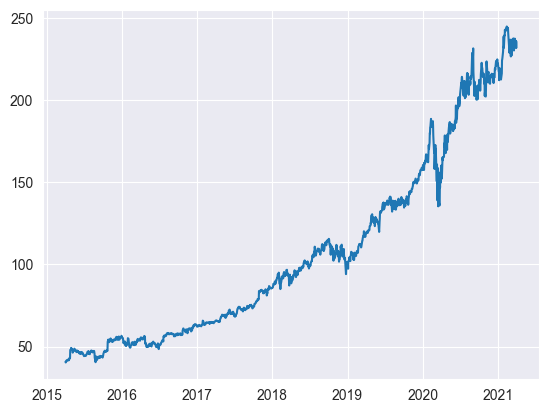

In [95]:
plt.plot(ts)

In [96]:
adfuller(ts,autolag='AIC')[1]

0.9982158366942122

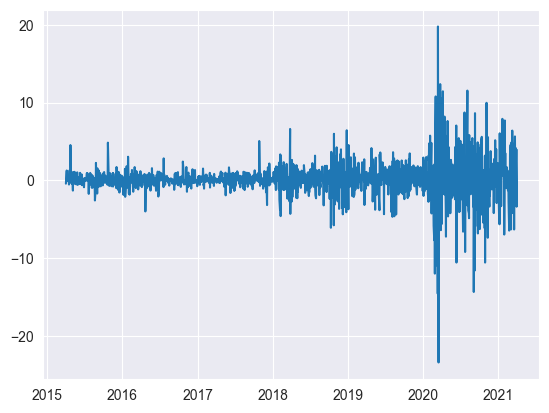

In [97]:
ts = ts.diff().dropna()
plt.plot(ts)

In [98]:
adfuller(ts,autolag='AIC')

(-10.038331065146357,
 1.5195939917535664e-17,
 24,
 1485,
 {'1%': -3.43476120520139,
  '5%': -2.863488262178673,
  '10%': -2.567807233388883},
 6597.0173474503645)

this proves that we need order of differencing as 1
d = 1

In [138]:
# Moving average model for Forecasting
ma_model = ARIMA(ts, order=(0, 0, 3))
ma_result = ma_model.fit()
print(ma_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1510
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -3375.662
Date:                Sat, 26 Oct 2024   AIC                           6761.325
Time:                        00:23:25   BIC                           6787.924
Sample:                             0   HQIC                          6771.230
                               - 1510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1287      0.050      2.553      0.011       0.030       0.228
ma.L1         -0.2731      0.011    -25.716      0.000      -0.294      -0.252
ma.L2          0.0985      0.011      8.899      0.0

/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


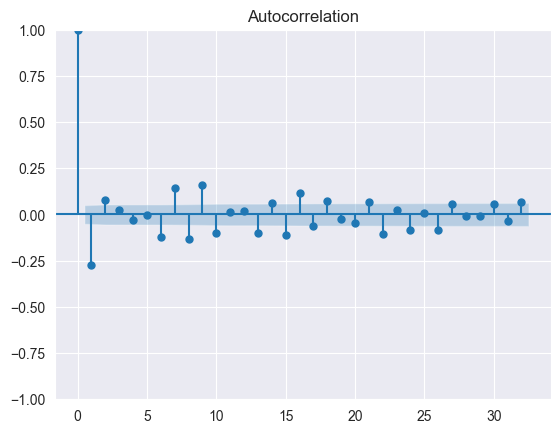

In [139]:
plot_acf(ts)
plt.show()

here in the autocorrelation plot since the lag drops to near 0 in lag 3 q = 3

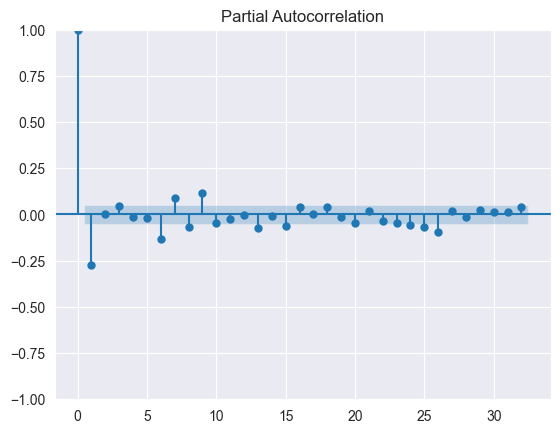

In [140]:
plot_pacf(ts)
plt.show()

sice the partial auto-correlation plot goes down to near 0 in lag 2 p = 2  

In [141]:
model = ARIMA(ts,order = (2,0,3))
model_ARIMA = model.fit()

/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters 

In [142]:
print(model_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1510
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -3367.593
Date:                Sat, 26 Oct 2024   AIC                           6749.186
Time:                        00:23:52   BIC                           6786.425
Sample:                             0   HQIC                          6763.054
                               - 1510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1289      0.046      2.811      0.005       0.039       0.219
ar.L1          1.1320      0.044     25.470      0.000       1.045       1.219
ar.L2         -0.7289      0.052    -13.971      0.0

Residual plots

In [143]:
residuals_arima = model_ARIMA.resid
residuals_arima

Date
2015-04-02 16:00:00   -0.558949
2015-04-06 16:00:00    0.981302
2015-04-07 16:00:00    0.152844
2015-04-08 16:00:00   -0.262643
2015-04-09 16:00:00   -0.182340
                         ...   
2021-03-25 16:00:00   -4.372000
2021-03-26 16:00:00    2.794867
2021-03-29 16:00:00    0.086835
2021-03-30 16:00:00   -3.256811
2021-03-31 16:00:00    2.850364
Length: 1510, dtype: float64

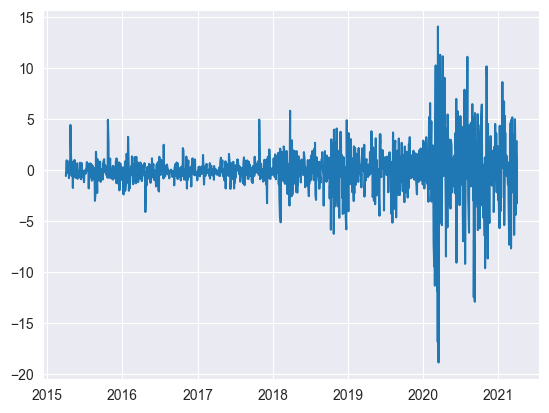

In [144]:
plt.plot(residuals_arima)
plt.show()

In [145]:
residuals_ma = ma_result.resid
residuals_ma

Date
2015-04-02 16:00:00   -0.558714
2015-04-06 16:00:00    0.977364
2015-04-07 16:00:00    0.166077
2015-04-08 16:00:00   -0.282962
2015-04-09 16:00:00   -0.174709
                         ...   
2021-03-25 16:00:00   -4.152001
2021-03-26 16:00:00    3.019219
2021-03-29 16:00:00   -0.111582
2021-03-30 16:00:00   -3.793709
2021-03-31 16:00:00    2.727773
Length: 1510, dtype: float64

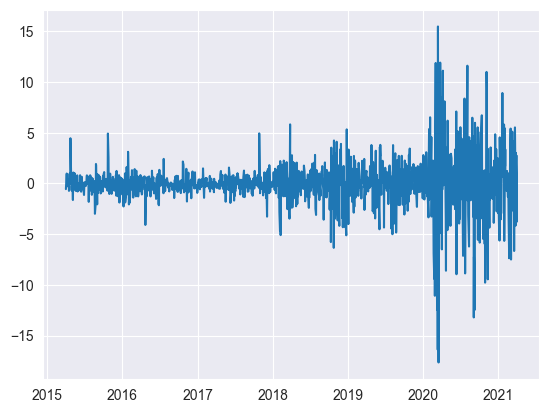

In [146]:
plt.plot(residuals_ma)
plt.show()

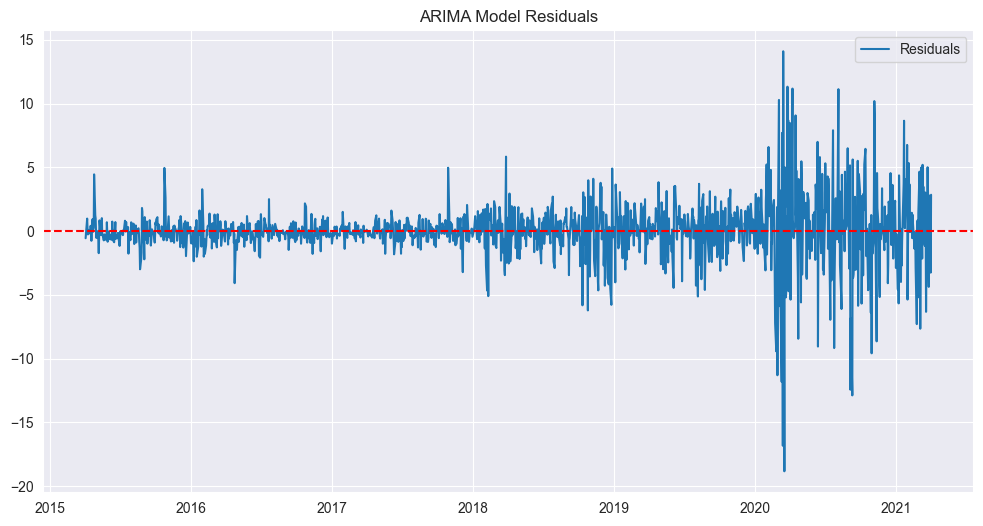

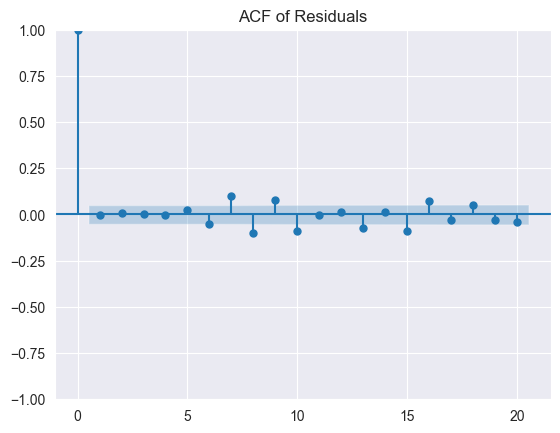

In [149]:
# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals_arima, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('ARIMA Model Residuals')
plt.legend()
plt.show()

# Plot ACF of residuals
plot_acf(residuals_arima, lags=20)
plt.title('ACF of Residuals')
plt.show()

If the residuals are randomly distributed and the ACF shows no significant correlation, the model is likely a good fit.

In [152]:
print(residuals_arima.describe())

count    1510.000000
mean       -0.000127
std         2.251359
min       -18.837018
25%        -0.641206
50%        -0.022376
75%         0.763953
max        14.103247
dtype: float64


If the mean of residuals is close to zero and the residuals appear normally distributed, the model likely captures the underlying pattern in the data well.

In [153]:
ma_result.mse

5.119954877729448

In [154]:
model_ARIMA.mse

5.065261829993087